In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv


In [2]:
daily_data = pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv")
submission = pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv")

In [3]:
submission.head()

,day_id,condition_text
0,D0001,NaN
1,D0002,NaN
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,NaN


In [4]:
daily_data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


In [5]:
# Check for missing values
print(daily_data.isnull().sum())

day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
dtype: int64


In [6]:
print(daily_data.dtypes)

day_id                       object
city_id                      object
temperature_celsius         float64
condition_text               object
wind_kph                    float64
wind_degree                   int64
pressure_mb                 float64
precip_mm                   float64
humidity                      int64
cloud                         int64
feels_like_celsius          float64
visibility_km               float64
uv_index                    float64
gust_kph                    float64
air_quality_us-epa-index      int64
sunrise                      object
sunset                       object
dtype: object


In [7]:
daily_data.describe()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,22.024577,10.304805,158.994469,1013.745938,0.165299,74.773591,32.073280,23.725752,9.745524,2.216730,16.930522,1.599032
std,6.615540,7.264472,103.021634,6.172045,0.937061,19.335724,32.584184,8.877424,2.489918,2.238163,10.541449,1.062513
min,-2.000000,3.600000,1.000000,982.000000,0.000000,4.000000,0.000000,-4.300000,0.000000,1.000000,0.700000,1.000000
25%,17.000000,5.000000,70.000000,1010.000000,0.000000,66.000000,0.000000,17.000000,10.000000,1.000000,9.000000,1.000000
50%,22.000000,8.300000,150.000000,1014.000000,0.000000,78.000000,25.000000,24.500000,10.000000,1.000000,15.100000,1.000000
75%,27.000000,13.000000,236.000000,1018.000000,0.000000,89.000000,68.000000,30.000000,10.000000,1.000000,22.300000,2.000000
max,45.000000,74.200000,360.000000,1036.000000,28.700000,100.000000,100.000000,73.600000,32.000000,10.000000,75.600000,6.000000


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
# Handle missing values
# Fill missing condition_text with a placeholder
daily_data['condition_text'].fillna('Missing', inplace=True)

/tmp/ipykernel_79/1870530526.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_data['condition_text'].fillna('Missing', inplace=True)


In [10]:
# Convert sunrise and sunset to datetime and extract useful features
daily_data['sunrise'] = pd.to_datetime(daily_data['sunrise'], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(daily_data['sunrise'], format='%I:%M %p').dt.minute
daily_data['sunset'] = pd.to_datetime(daily_data['sunset'], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(daily_data['sunset'], format='%I:%M %p').dt.minute


In [11]:
# Example of creating a day length feature
daily_data['day_length'] = daily_data['sunset'] - daily_data['sunrise']

In [12]:
daily_data.drop(columns=['sunrise', 'sunset'],axis=1, inplace = True )

In [13]:
daily_data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,day_length
0,D0001,C001,27.0,Missing,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,795
1,D0002,C001,22.0,Missing,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,793
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,793
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,790
4,D0005,C001,18.0,Missing,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,788


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


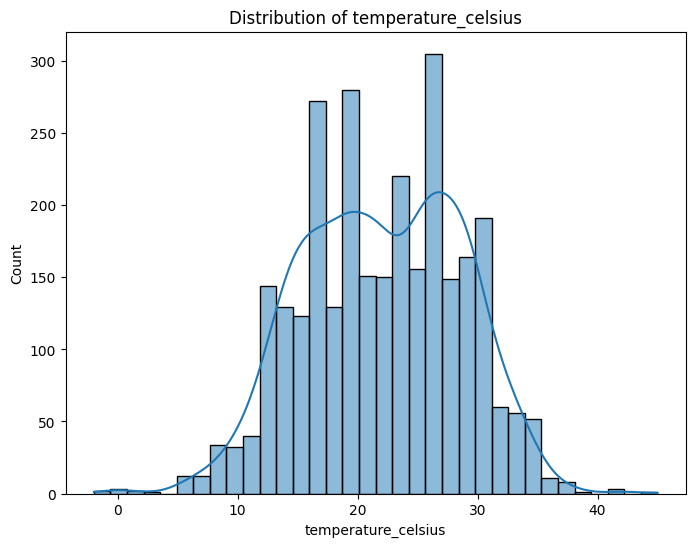

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


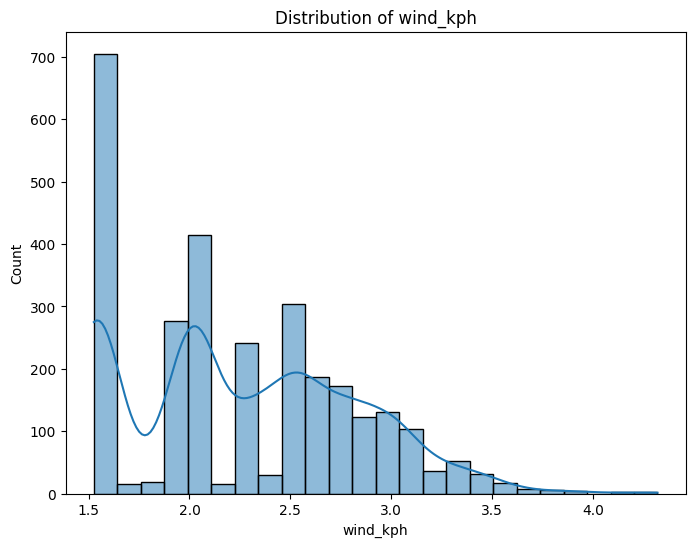

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


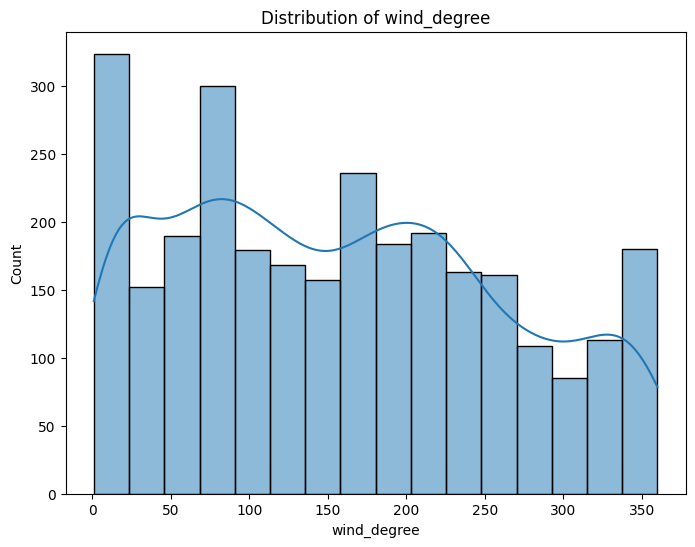

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


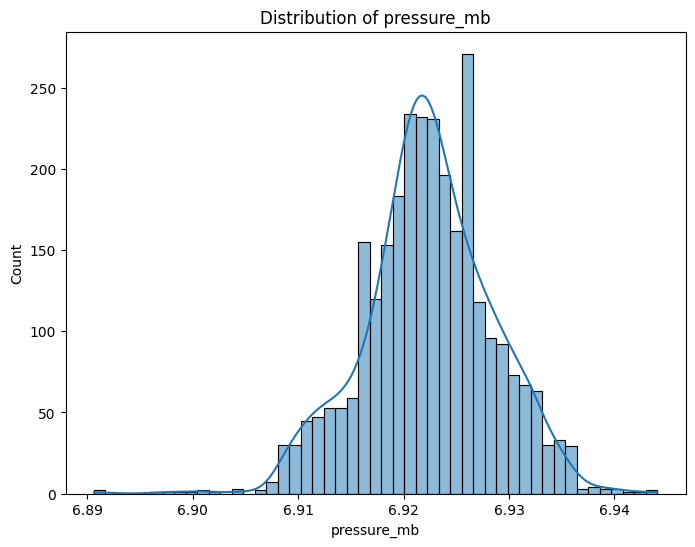

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


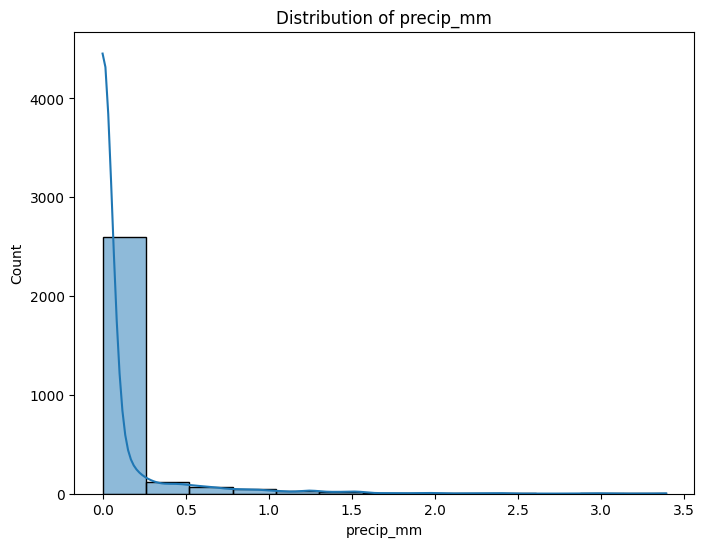

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


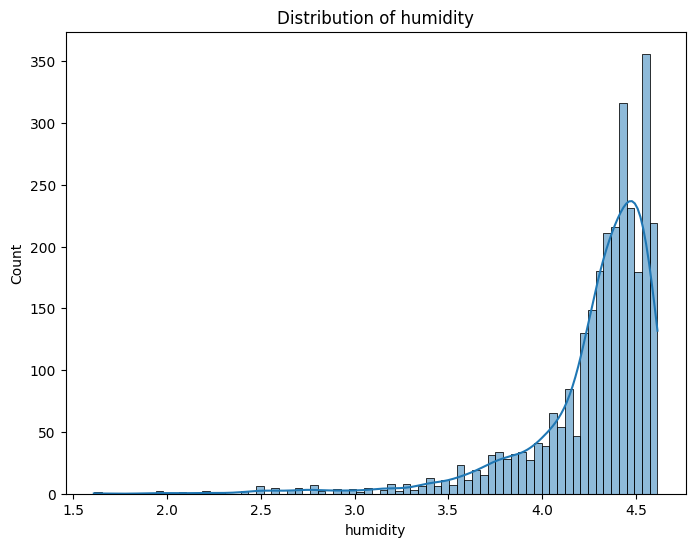

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


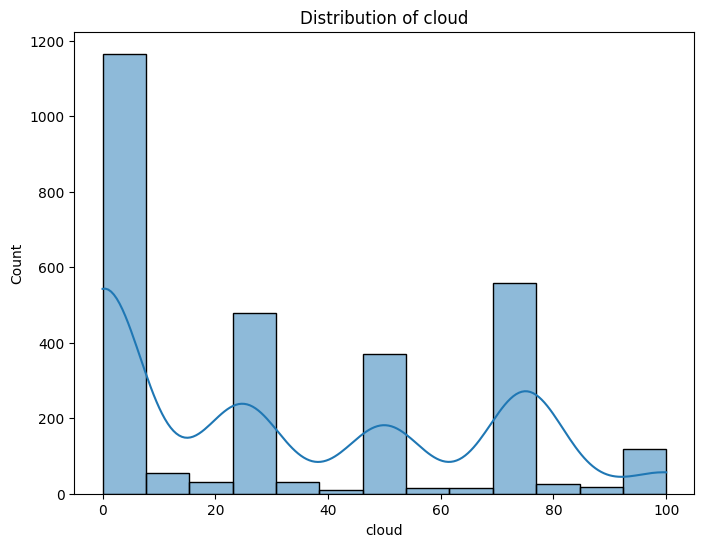

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


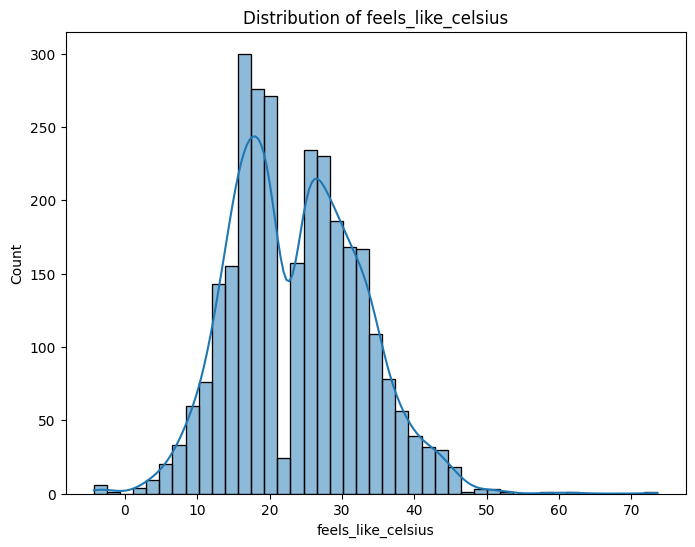

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


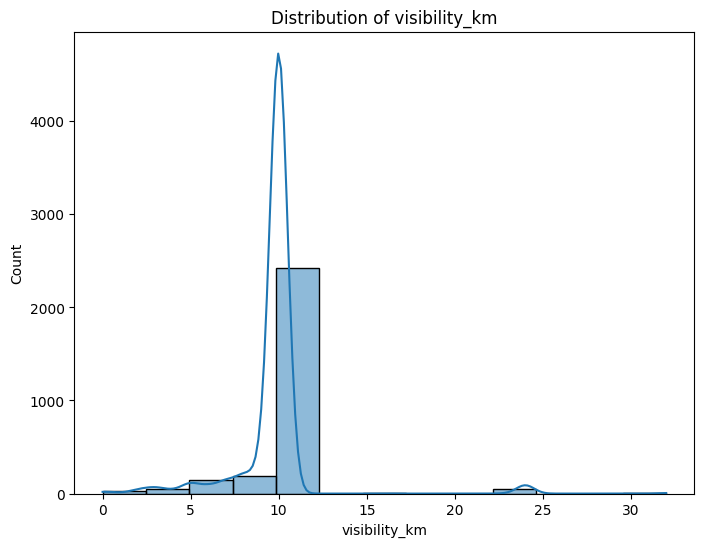

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


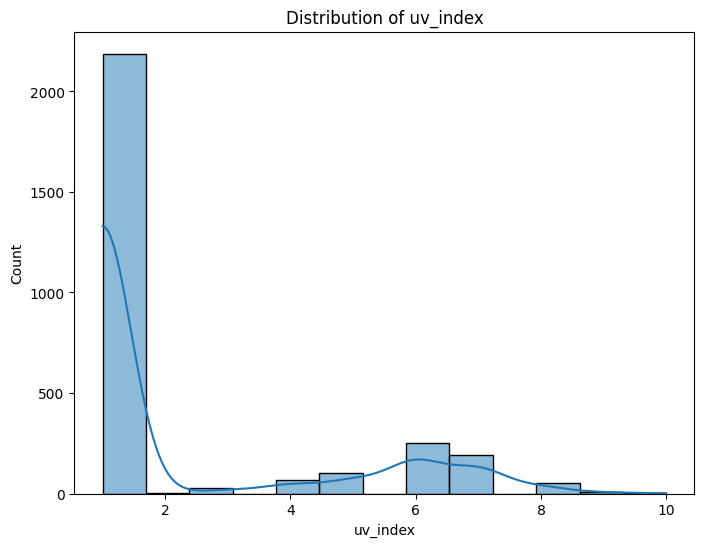

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


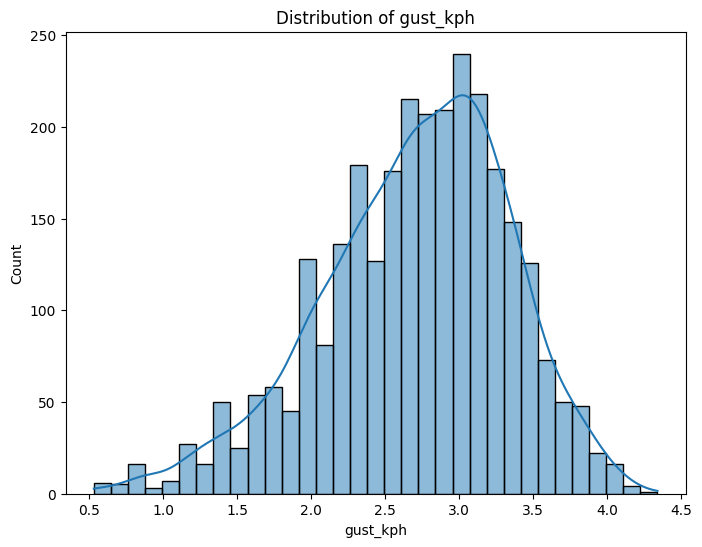

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


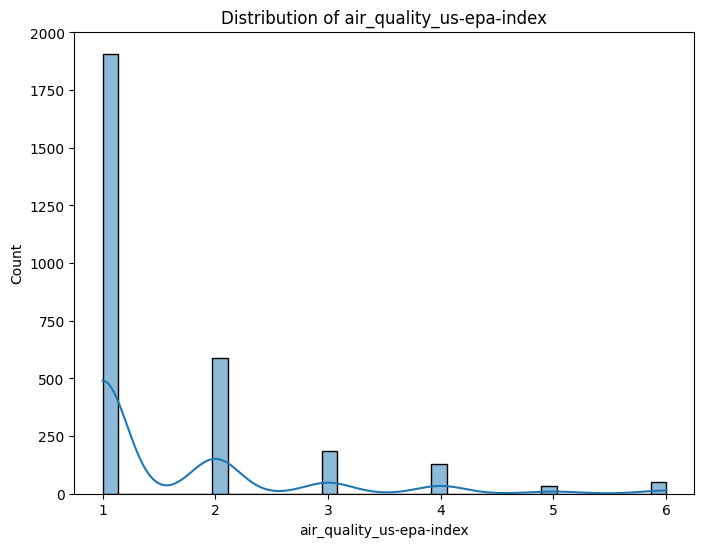

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


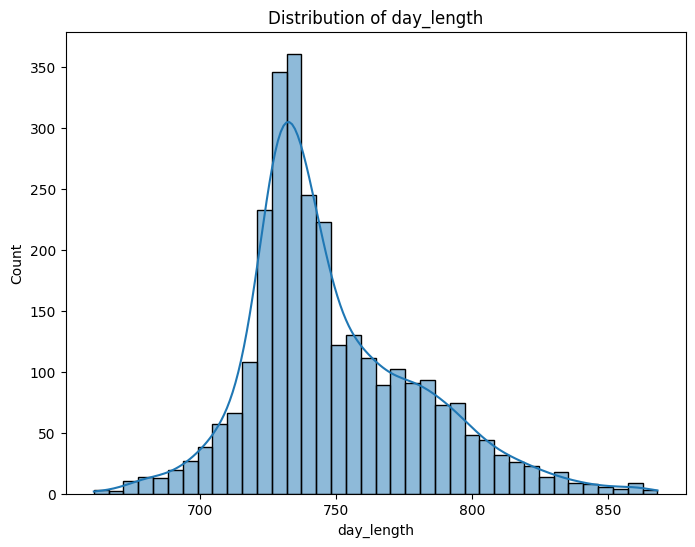

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_check = ['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 
                     'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 
                     'air_quality_us-epa-index', 'day_length']

for feature in features_to_check:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [29]:
skewed_features = ['wind_kph', 'pressure_mb', 'precip_mm', 'humidity', 'gust_kph', 'day_length']

for feature in skewed_features:
    daily_data[feature] = np.log1p(daily_data[feature])  # log1p is equivalent to log(x + 1)


In [30]:
daily_data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,day_length
0,D0001,C001,27.0,Missing,1.085221,210,2.068726,0.000000,1.610903,75,28.0,10.0,6.0,1.268981,2,6.679599
1,D0002,C001,22.0,Missing,1.085221,170,2.068726,0.000000,1.668474,75,24.5,10.0,1.0,1.433794,1,6.677083
2,D0003,C001,20.0,Light Rain with Thunder,0.926659,10,2.069351,0.995009,1.725463,75,20.0,10.0,1.0,1.283727,1,6.677083
3,D0004,C001,17.0,Clear and Sunny,1.085221,150,2.070221,0.000000,1.702680,0,17.0,10.0,1.0,1.253173,1,6.673298
4,D0005,C001,18.0,Missing,0.926659,92,2.070345,0.000000,1.714496,0,18.0,10.0,1.0,1.194706,1,6.670766


In [31]:
# Encode the target variable (excluding 'Missing' rows)
known_conditions = daily_data[daily_data['condition_text'] != 'Missing']
le = LabelEncoder()
known_conditions['condition_text_encoded'] = le.fit_transform(known_conditions['condition_text'])

# Split data into features and target
features = known_conditions.drop(columns=['day_id', 'city_id', 'condition_text', 'condition_text_encoded'])
target = known_conditions['condition_text_encoded']

/tmp/ipykernel_79/3204323482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_conditions['condition_text_encoded'] = le.fit_transform(known_conditions['condition_text'])


In [32]:
features.head()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,day_length
2,20.0,0.926659,10,2.069351,0.995009,1.725463,75,20.0,10.0,1.0,1.283727,1,6.677083
3,17.0,1.085221,150,2.070221,0.000000,1.702680,0,17.0,10.0,1.0,1.253173,1,6.673298
6,21.0,0.959135,310,2.069849,0.000000,1.725463,50,21.0,10.0,1.0,1.329412,2,6.664409
18,19.0,0.926659,64,2.070097,0.000000,1.702680,0,19.0,10.0,1.0,1.172487,3,6.622736
27,19.0,0.926659,83,2.069226,0.000000,1.668474,25,19.0,10.0,1.0,1.172487,1,6.664409


In [33]:
target.head()

2     3
3     0
6     6
18    0
27    6
Name: condition_text_encoded, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [36]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Model Accuracy: {accuracy:.2f}')

XGBoost Model Accuracy: 0.74


In [40]:
import optuna

# Define objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
    }
    
    model = XGBClassifier(**param, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Train the final model with the best hyperparameters
best_params = study.best_params
print(f'Best Parameters: {best_params}')

xgb_model = XGBClassifier(**best_params, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Tuned XGBoost Model Accuracy: {accuracy:.2f}')

[I 2024-06-23 14:33:12,729] A new study created in memory with name: no-name-628a7cd1-6610-4c13-8ebf-4c96ea8e667c
/tmp/ipykernel_79/3778796764.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_79/3778796764.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_79/3778796764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5

Best Parameters: {'n_estimators': 282, 'max_depth': 7, 'learning_rate': 0.022953028514003156, 'subsample': 0.9943061036621597, 'colsample_bytree': 0.9824360362901552}
Tuned XGBoost Model Accuracy: 0.76


Hyperparameter tuning

In [38]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # Initialize the XGBoost model
# xgb_model = xgb.XGBClassifier(random_state=42)

# # Set up the grid search
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Score: {best_score:.2f}")

# # Train the model with the best parameters
# xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
# xgb_model.fit(X_train, y_train)

# # Make predictions
# y_pred = xgb_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Tuned XGBoost Model Accuracy: {accuracy:.2f}')


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END 

In [ ]:
# from catboost import CatBoostClassifier

# # Train a CatBoost Classifier
# catboost_model = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
# catboost_model.fit(X_train, y_train)

# # Make predictions
# y_pred = catboost_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'CatBoost Model Accuracy: {accuracy:.2f}')

In [41]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean cross-validated accuracy: {np.mean(cv_scores):.2f}')


Cross-validated scores: [0.62337662 0.68831169 0.75324675 0.71052632 0.71052632]
Mean cross-validated accuracy: 0.70


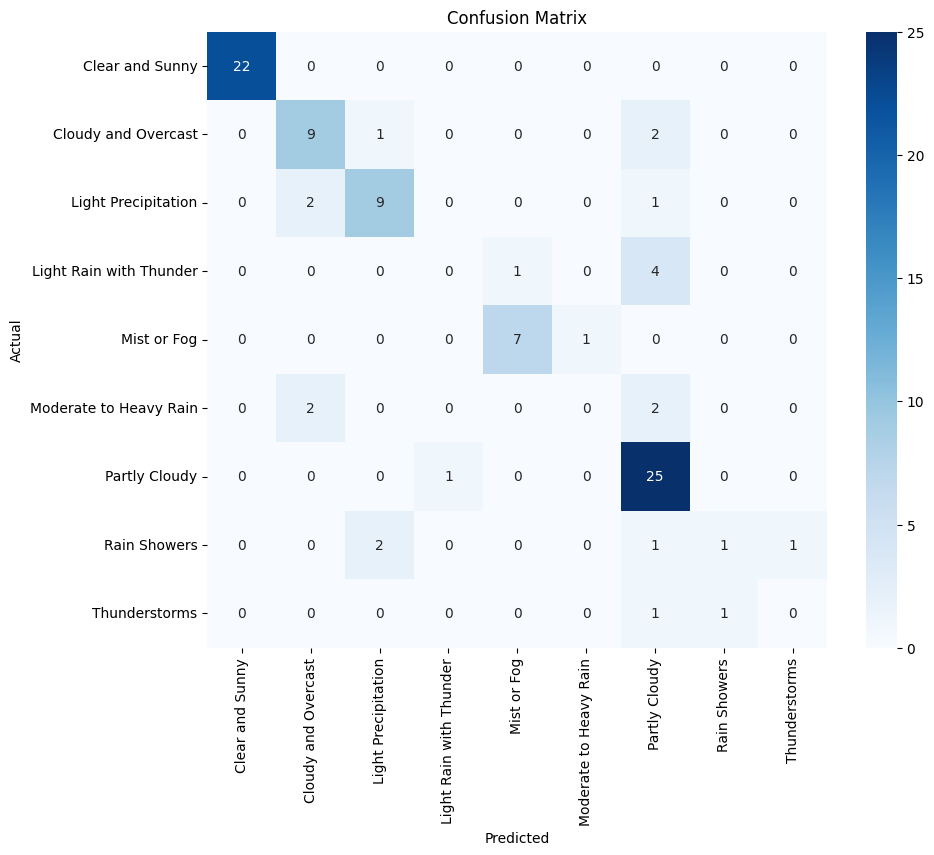

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [44]:
# Predict missing values in the original dataset
missing_data = daily_data[daily_data['condition_text'] == 'Missing']
missing_features = missing_data.drop(columns=['day_id', 'city_id', 'condition_text'])

# Predict using the trained model
predicted_conditions = xgb_model.predict(missing_features)
missing_data['condition_text'] = le.inverse_transform(predicted_conditions)

# Combine with original dataset
daily_data.loc[daily_data['condition_text'] == 'Missing', 'condition_text'] = missing_data['condition_text']

# Create submission file
submission = daily_data[['day_id', 'condition_text']]
submission.to_csv('submission.csv', index=False)

/tmp/ipykernel_79/2570380735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['condition_text'] = le.inverse_transform(predicted_conditions)


In [45]:
submission.head()

,day_id,condition_text
0,D0001,Partly Cloudy
1,D0002,Partly Cloudy
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny
